<a href="https://colab.research.google.com/github/rashmigr01/Speech-emotion-recognition/blob/main/Assignments/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-28 06:24:40--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-28 06:24:41--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-28 06:24:41 (25.6 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-28 06:24:41--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (gi

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it
  path_X = "X.npy"
  path_y = "y.npy"
  X = np.load(path_X)
  y = np.load(path_y)

  return X, y

In [ ]:
def get_linear_model(X, y):
  # This should return a proper linear model without bias of type y = XW
  out_shape = 1
  D = X.shape[1]
  W = np.random.randn(D, out_shape)

  return W

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y
  error = np.square(y - y_pred).mean()

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0
  W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  error_hist = []
  W = get_linear_model(X,y)
  for i in range(epochs):
    y_pred = X.dot(W)
    error_hist.append(MSE(y, y_pred))
    # print(MSE(y, y_pred)) ...... Uncomment this to print the MSE after each epoch
    W -= lr*(((y_pred-y)*X).mean())

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

5.490059820643823 



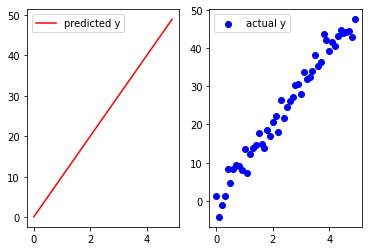

In [ ]:
X,y = load_data_LR()
W = train_by_algebra(X,y)
y_pred = X.dot(W)

print(MSE(y,y_pred),'\n')

plt.subplot(1,2,1)
plt.plot(X,y_pred,label='predicted y', color='red')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.scatter(X,y,label='actual y', color='blue')
plt.legend(loc='best')
plt.show()

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

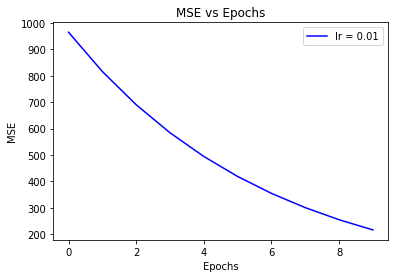

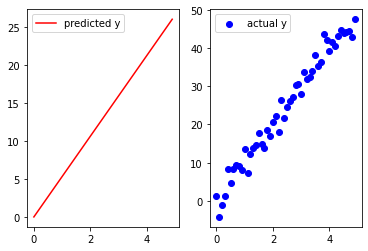

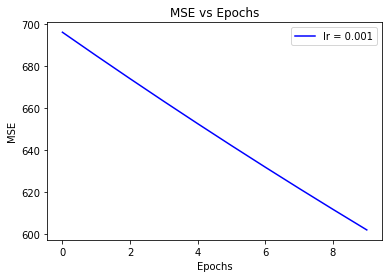

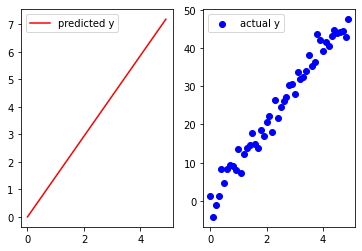

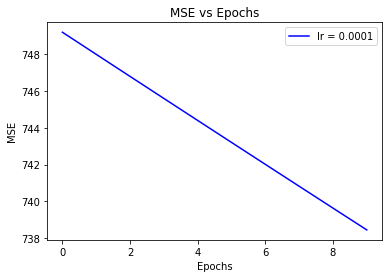

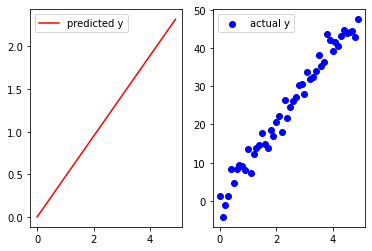

In [ ]:
lr = [0.01, 0.001, 0.0001]
for i in range(len(lr)):
  W,eh = train_by_GD(X, y, 10, lr[i])
  y_pred = X.dot(W)
  plt.plot(range(10),eh,label = 'lr = '+str(lr[i]), color='blue')
  plt.title("MSE vs Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend(loc='best')
  plt.show()
  
  plt.subplot(1,2,1)
  plt.plot(X,y_pred,label='predicted y', color='red')
  plt.legend(loc='best')

  plt.subplot(1,2,2)
  plt.scatter(X,y,label='actual y', color='blue')
  plt.legend(loc='best')
  plt.show()

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label = 'accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model
  model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = input_shape),
                               tf.keras.layers.Dense(7200, activation = 'relu'),
                               tf.keras.layers.Dense(2304, activation = 'relu'),
                               tf.keras.layers.Dense(1024, activation = 'relu'),
                               tf.keras.layers.Dense(64, activation = 'relu'),
                               tf.keras.layers.Dense(num_class, activation = 'softmax')])

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model
  model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = input_shape),
                               tf.keras.layers.MaxPooling2D(2, 2),
                               tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation = 'relu'),
                               tf.keras.layers.MaxPooling2D(2, 2),
                               tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation = 'relu'),
                               tf.keras.layers.MaxPooling2D(2, 2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(64, activation = 'relu'),
                               tf.keras.layers.Dense(num_class, activation = 'softmax')])

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 4s 40ms/step - loss: 1398.1909 - accuracy: 0.0996 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 4s 37ms/step - loss: 7.3843 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 4s 37ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 4s 37ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 4s 37ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 4s 37ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 4s 37ms/step - loss: 2.3026 - accuracy: 0.0946 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/10

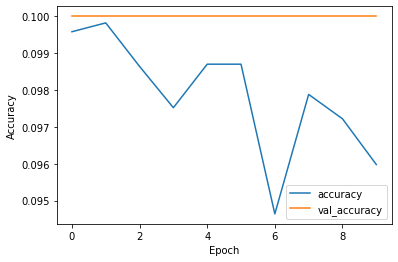

In [ ]:
model = build_fc_model()
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 512, validation_data = (x_test, y_test))
plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 2s 17ms/step - loss: 4.4219 - accuracy: 0.1927 - val_loss: 2.1642 - val_accuracy: 0.2335
Epoch 2/10
98/98 [==============================] - 1s 14ms/step - loss: 1.8331 - accuracy: 0.3422 - val_loss: 1.7397 - val_accuracy: 0.3821
Epoch 3/10
98/98 [==============================] - 1s 14ms/step - loss: 1.5841 - accuracy: 0.4424 - val_loss: 1.5450 - val_accuracy: 0.4528
Epoch 4/10
98/98 [==============================] - 1s 14ms/step - loss: 1.4349 - accuracy: 0.4977 - val_loss: 1.5812 - val_accuracy: 0.4607
Epoch 5/10
98/98 [==============================] - 1s 14ms/step - loss: 1.3214 - accuracy: 0.5401 - val_loss: 1.2605 - val_accuracy: 0.5584
Epoch 6/10
98/98 [==============================] - 1s 14ms/step - loss: 1.2310 - accuracy: 0.5711 - val_loss: 1.4261 - val_accuracy: 0.5086
Epoch 7/10
98/98 [==============================] - 1s 14ms/step - loss: 1.1618 - accuracy: 0.5966 - val_loss: 1.5287 - val_accuracy: 0.4798
Epoch 8/10
98

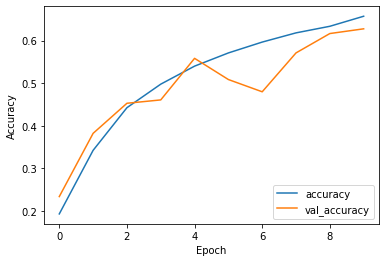

In [ ]:
model = build_cnn_model()
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 512, validation_data = (x_test, y_test))
plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("Observations :\n1. Judging by the Accuracy vs Epoch graph, The accuracy obtained using the CNN model is much higher than that of the fully connected neural network model")
print("2. The total number of trainanble parameters in the fully connected neural network model (41,143,274) are very high in comparision to that of the CNN model (73,418)")

Observations :
1. Judging by the Accuracy vs Epoch graph, The accuracy obtained using the CNN model is much higher than that of the fully connected neural network model
2. The total number of trainanble parameters in the fully connected neural network model (41,143,274) are very high in comparision to that of the CNN model (73,418)
